<a href="https://githubtocolab.com/Astolfo2332/ICFES_pro_prediction/Final_proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

<div style="display: flex; align-items: center;">
    <div>
        <h2>Actividad final portafolio</h2>
   self.__targetel López</h2>
        <h2>ID 1001014378</h2>
    </div>
    <img src="https://yt3.ggpht.com/-10IUL9wra6k/AAAAAAAAAAI/AAAAAAAAAAA/UOBLu1uYOOE/s900-c-k-no/photo.jpg" alt="Image description" width="200" style="margin-left: 20px;"/>
</div>

## 0. Obtención de datos


El dataset es obtenido por medio de una competencia de Keaggle. Este contiene información socioeconómica de los estudiantes al momento de presentar la prueba ICFES en Colombia desde el 2018 a 2021. La meta es encontrar una relación entre estas características y su puntaje final en la prueba lo cual se establece con 4 variables, bajo, medio-bajo, medio-alto y alto.


La prueba ICFES en Colombia se realiza a los estudiantes a punto de obtener su pregrado, lo cual es el primer paso a la vida laboral. Esta se compone por varios módulos como razonamiento lógico, ciencias sociales, lectura crítica, escritura e inglés.

También se debe saber que Colombia es un país con diferencias socioeconómicas muy marcadas las cuales afectan en gran medida el rendimiento de los estudiantes o su futuro académico. Así que es importante de antemano conocer las necesidades y falencia que pueda tener un estudiante a la hora de presentar el examen ICFES para de antemano poder ayudar y a las poblaciones más vulnerables y así romper las barreras sociales y económicas a la hora de educar estudiantes capaces de culminar la educación superior. Además de intrínsecamente evaluar al programa estudiado y la institución educativa.



### 0.1 Por medio de Kaggle (recomendado)

- Se debe tener una cuenta de Kaggle.
- Descargar el token de acceso a traves de la pagina.
- Crear una carpeta padre en la ubicación home de os llamada "./kaggle" . (este proceso se automatiza en este notebook solo es necesario tener el kaggle.json en la carpeta kaggle, aunque solo en entornos basados en UNIX)

A traves de el api de kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle/kaggle.json ~/.kaggle/
!kaggle competitions download -c udea-ai4eng-20242
!unzip udea-ai4eng-20242.zip
!mkdir data
!mv *.csv data/

cp: no se puede efectuar `stat' sobre 'kaggle/kaggle.json': No existe el fichero o el directorio
Traceback (most recent call last):
  File "/usr/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/lib/python3.12/site-packages/kaggle/__init__.py", line 3, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/usr/lib/python3.12/site-packages/kaggle/api/__init__.py", line 6, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/usr/lib/python3.12/site-packages/kaggle/api/kaggle_api_extended.py", line 76, in <module>
    import bleach
ModuleNotFoundError: No module named 'bleach'
unzip:  cannot find or open udea-ai4eng-20242.zip, udea-ai4eng-20242.zip.zip or udea-ai4eng-20242.zip.ZIP.
mkdir: no se puede crear el directorio «data»: El fichero ya existe
zsh:1: no matches found: *.csv


### 0.2 A traves del One Drive de la universidad

En construcción

## 0.3 Objetivos

El objetivo principal del trabajo es producir un pipeline integrado para el preprocesamiento de los datos y el entrenamiento de varios modelos de una manera sencilla a través de pocos comandos.

Para ello se debe:

- Analizar los datos de entrada.
- Preprocesar la información.
- Entrenar modelos.
- Evaluar dichos modelos con métricas o gráficas.
- Realizar predicciones.

## 1. Exploración de la información

### 1.1 Carga de datos

In [2]:
import pandas as pd

In [71]:
df = pd.read_csv("data/train.csv")
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Después de la carga nos interesa conocer cuales son sus datos y como están distribuidos

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

Entendiendo entonces que nuestra variable a predecir es RENDIMIENTO_GLOBAL, la cual al ser categórica encasilla esta tarea en un problema de clasificación, también podemos observar que la mayoría del dataset se compone de datos categóricos a diferencia de ID y periodo.

El dataset lo constituye:
- ID: valor específico del estudiante
- ESTU_PRGM_ACADEMICO: Programa académico culminado
-	ESTU_PRGM_DEPARTAMENTO: Departamento donde se realiza la prueba.
-	ESTU_VALORMATRICULAUNIVERSIDAD: Valor del semestre académico del estudiante.
-	ESTU_HORASSEMANATRABAJA: Cantidad de horas de trabajo a la semana del estudiante.
-	FAMI_ESTRATOVIVIENDA: Estrato del estudiante, esta es una medida económica de las facilidades o servicios los cuales cuenta cerca del hogar. A mayor estrato usualmente se equipará un mejor estilo de vida.
-	FAMI_TIENEINTERNET: Respuesta en Si o No si el estudiante cuenta con internet
-	FAMI_EDUCACIONPADRE: Nivel de educación máxima obtenido por el padre
-	FAMI_EDUCACIONMADRE: Nivel de educación máxima obtenido por la madre.
-	ESTU_PAGOMATRICULAPROPIO: Valor si el estudiante paga la matricula con sus propios recursos.
-	RENDIMIENTO_GLOBAL: Clase a predecir, como se menciona anteriormente se divide en 4 clases.

Así entonces, los datos al ser categóricos nos interesan saber cómo están distribuidos a que datos les podemos prestar mayor interés en el entrenamiento.

Inicialmente observamos cuantos datos existen de cada clase a predecir para saber si el dataset esta desbalanceado y así tomar acciones a futuro.

In [63]:
#Observamos la distribución de los datos target
df["RENDIMIENTO_GLOBAL"].value_counts()

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64

En este caso los valores de cada clase son muy similares, también observaremos la cantidad de datos faltantes para su posterior reemplazo dependiendo de la distribución de los grupos de estudio para cada clase.

In [73]:
def null_data_info(df):
    #Obtenemos los valores nulos de cada columna y se organiza de manera descendente
    total = df.isnull().sum().sort_values(ascending=False)
    #Extraemos su porcentaje con respecto a los datos y los ordenamos de manera descendente
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    #Unimos las dos columnas
    missing = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing

null_data_info(df)

,Total,Percent
FAMI_ESTRATOVIVIENDA,32137,4.640722
ESTU_HORASSEMANATRABAJA,30857,4.455884
FAMI_TIENEINTERNET,26629,3.845343
FAMI_EDUCACIONMADRE,23664,3.417184
FAMI_EDUCACIONPADRE,23178,3.347004
ESTU_PAGOMATRICULAPROPIO,6498,0.938339
ESTU_VALORMATRICULAUNIVERSIDAD,6287,0.907870
ID,0,0.000000
PERIODO,0,0.000000
ESTU_PRGM_ACADEMICO,0,0.000000


Siendo estos la mayoría datos categóricos, los cuales reemplazaremos por medio de la moda de cada clase en su grupo especifico.

In [74]:
def fill_na(df):
    #Agrupamos los valores por cada clase, luego aplicamos una transformación a cada columna donde se extrae el primer valor de la moda, solo si
    #no está vacío de lo contrario se pasa un nan
    modes = df.groupby("RENDIMIENTO_GLOBAL", observed=False).transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.nan)
    #Si se encuentra un vacío se reemplaza por el valor del frame modes
    df.fillna(modes, inplace=True)
    return df

In [75]:
df = fill_na(df)

Evaluamos que la corrección funcione

In [9]:
null_data_info(df)

,Total,Percent
ID,0,0.0
PERIODO,0,0.0
ESTU_PRGM_ACADEMICO,0,0.0
ESTU_PRGM_DEPARTAMENTO,0,0.0
ESTU_VALORMATRICULAUNIVERSIDAD,0,0.0
ESTU_HORASSEMANATRABAJA,0,0.0
FAMI_ESTRATOVIVIENDA,0,0.0
FAMI_TIENEINTERNET,0,0.0
FAMI_EDUCACIONPADRE,0,0.0
FAMI_EDUCACIONMADRE,0,0.0


Ahora nos interesa observar como esta distribuida la información

## 1.2 Dataset de test

También se contiene un dataset de prueba el cual no contiene la columna de RENDMIENTO_GLOBAL

In [65]:
df_test = pd.read_csv("data/test.csv")
null_data_info(df_test)

,Total,Percent
FAMI_ESTRATOVIVIENDA,13795,4.648130
ESTU_HORASSEMANATRABAJA,13379,4.507962
FAMI_TIENEINTERNET,11539,3.887987
FAMI_EDUCACIONMADRE,10223,3.444569
FAMI_EDUCACIONPADRE,9993,3.367073
ESTU_PAGOMATRICULAPROPIO,2807,0.945799
ESTU_VALORMATRICULAUNIVERSIDAD,2723,0.917496
Unnamed: 0,0,0.000000
ID,0,0.000000
PERIODO,0,0.000000


Donde de manera similar tenemos que realizar un reemplazo de información faltante pero lo haremos más adelante

### 1.1.1 Histogramas basados en grupos

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [80]:
def plot_distribution(df, column, target, title="Frecuencia de valores con respecto al target"):
    plt.figure(figsize=(12, 9))
    sns.countplot(x=column, data=df, hue=target)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(title=target)
    plt.grid()
    plt.show()

In [67]:
#Definimos una función que extrae el primer número de una cadena si no se encuentra se retorna infinito
def get_oredered(s:str):
    numbers = re.findall(r'\d+', s)
    #map pasa los numeros de str a int y luego se extrae el mínimo
    return min(map(int, numbers)) if numbers else float('inf')

#Ahora los organizamos con respecto a la función get_ordered
def sort_strings(lst):
    return sorted(lst, key=get_oredered)

In [ ]:
#Se deben establecer un orden para las columnas así evitamos que las gráficas se muestren de manera incorrecta, organizándolos de la forma
#donde inicialmente se estipula el orden y luego con la función de categorical se ordenan

target_order = ["bajo", "medio-bajo", "medio-alto", "alto"]
df["RENDIMIENTO_GLOBAL"] = pd.Categorical(df["RENDIMIENTO_GLOBAL"], categories=target_order, ordered=True)

estrato_order = sort_strings(df["FAMI_ESTRATOVIVIENDA"].unique())
df["FAMI_ESTRATOVIVIENDA"] = pd.Categorical(df["FAMI_ESTRATOVIVIENDA"], categories=estrato_order, ordered=True)



#### 1.1.1.1 Influencia del estrato en el rendimiento

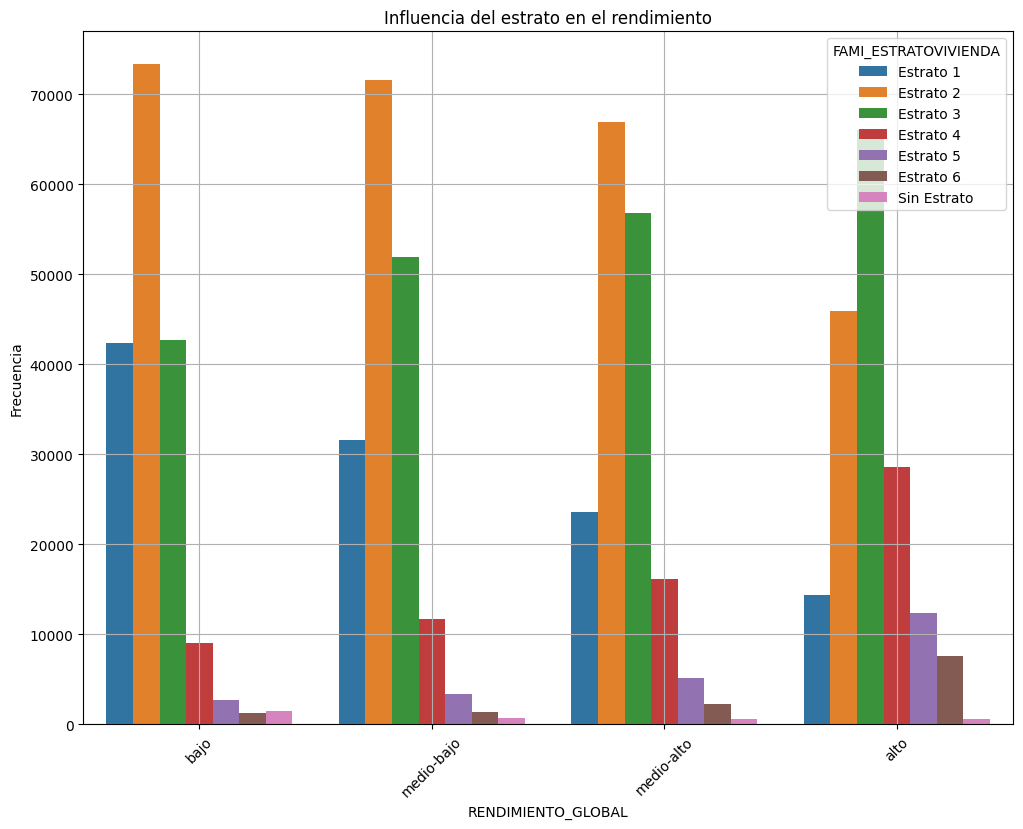

In [86]:
plot_distribution(df, "RENDIMIENTO_GLOBAL", "FAMI_ESTRATOVIVIENDA", "Influencia del estrato en el rendimiento")


Donde podemos observar un aumento de puntaje a medida que existe más población de los estratos elevados. Y claro una disminución de puntaje con respecto a estratos más bajos.

#### 1.1.1.2 Influencia de las horas de trabajo en el rendimiento

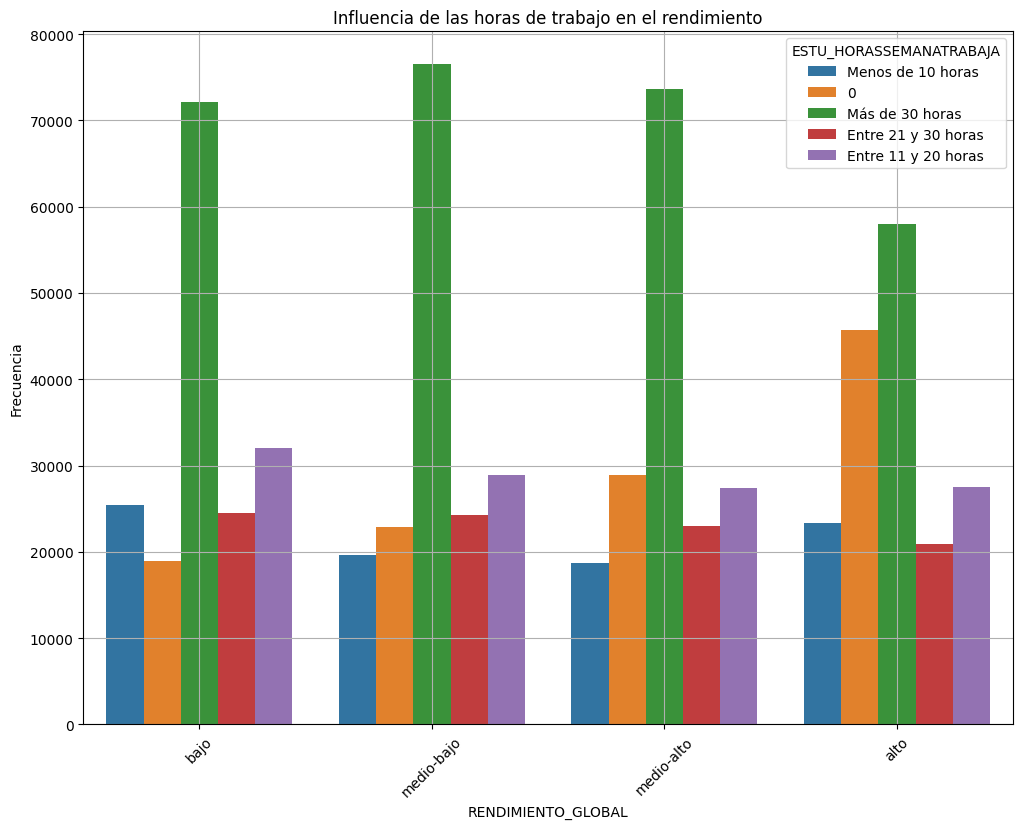

In [87]:
order = sort_strings(df["ESTU_HORASSEMANATRABAJA"].unique())
df['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df['FAMI_ESTRATOVIVIENDA'], categories=order, ordered=True)
plot_distribution(df, "RENDIMIENTO_GLOBAL", "ESTU_HORASSEMANATRABAJA", "Influencia de las horas de trabajo en el rendimiento")


 En este caso observamos que las horas de trabajo no parecen influenciar mucho en el desempeño de los estudiantes ya que todas las distribuciones son similares para cada clase.

#### 1.1.1.3 Influencia del valor de matricula


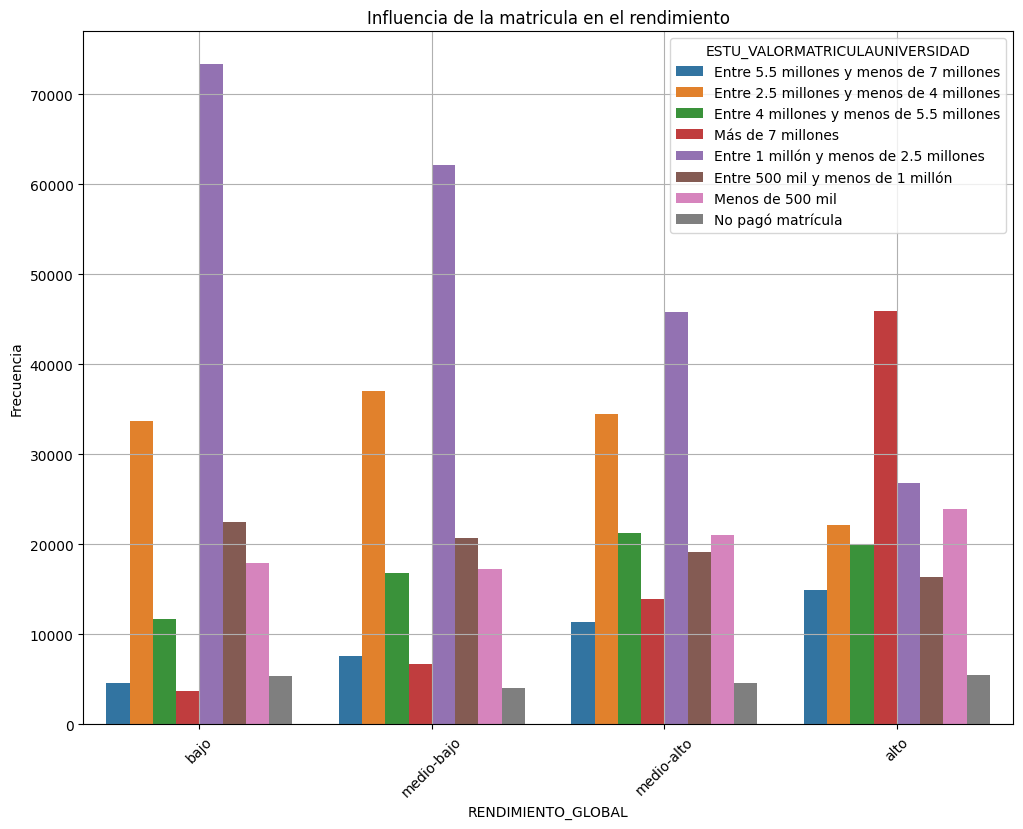

In [88]:
order = sort_strings(df["ESTU_VALORMATRICULAUNIVERSIDAD"].unique())
df['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df["ESTU_VALORMATRICULAUNIVERSIDAD"], categories=order, ordered=True)
plot_distribution(df, "RENDIMIENTO_GLOBAL", "ESTU_VALORMATRICULAUNIVERSIDAD", "Influencia de la matricula en el rendimiento")


En este caso solo se puede asumir que el valor entre 1 mill y 2.5 mill es más propenso a tener un menor puntaje en las pruebas

#### 1.1.1.4 Distribución de la media departamental

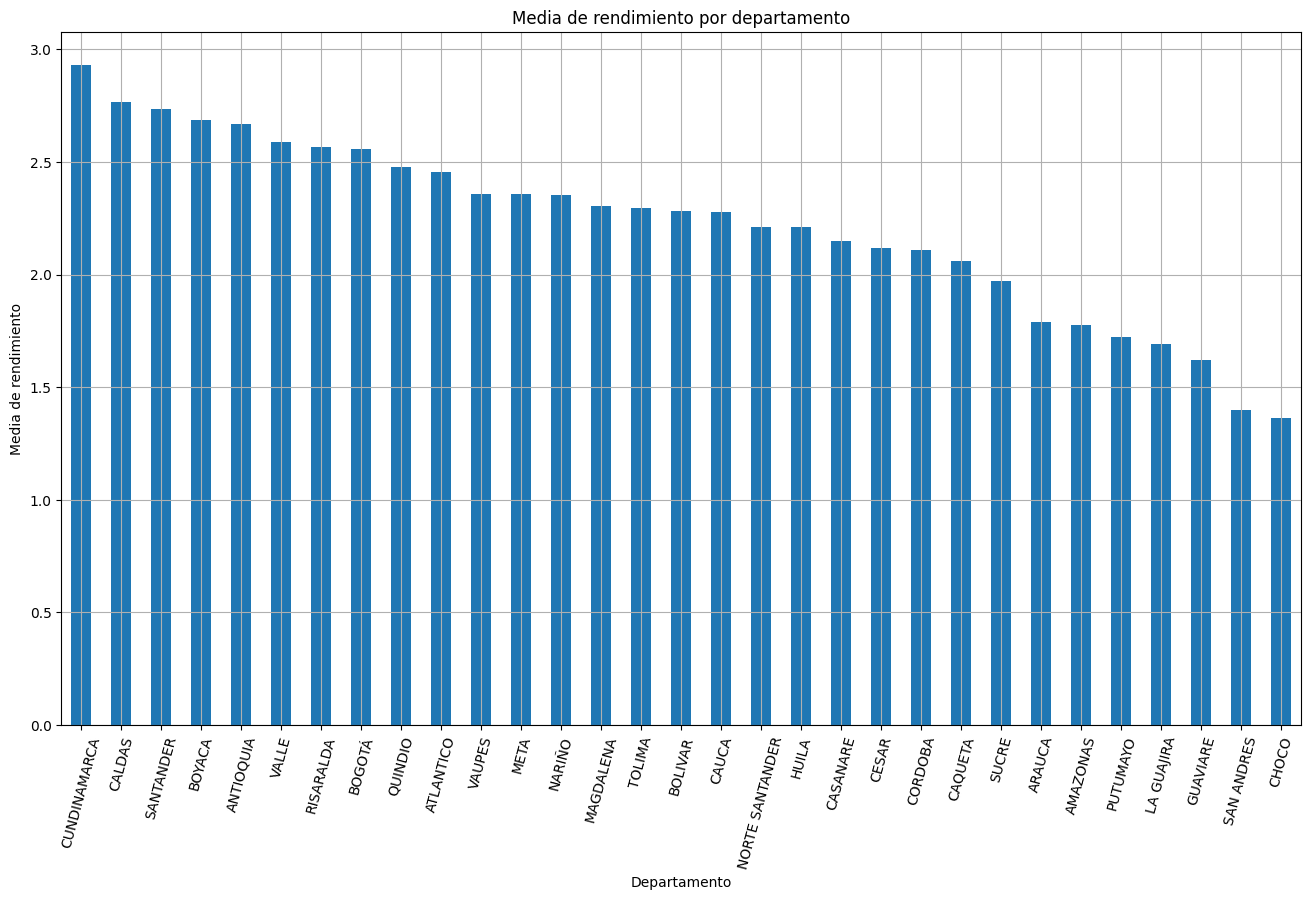

In [89]:
#Inicialmente agregamos un encoding a la columna para poder promediar los resultados
df["VAL_REND"] = df["RENDIMIENTO_GLOBAL"].map({"bajo": 1, "medio-bajo": 2, "medio-alto": 3, "alto": 4}).astype(int)
#Agrupamos por departamento y obtenemos la media
department_mean = df.groupby("ESTU_PRGM_DEPARTAMENTO")["VAL_REND"].mean().sort_values(ascending=False)

department_mean.plot(kind="bar", figsize=(16, 9))
plt.title("Media de rendimiento por departamento")
plt.xlabel("Departamento")
plt.ylabel("Media de rendimiento")
plt.xticks(rotation=75)
plt.grid()
plt.show()


Se puede observar una gran diferencia entre departamentos, pero no se puede asumir que sea una relación directa con el rendimiento de los estudiantes, ya que puede ser un sesgo de la cantidad de estudiantes que presentan la prueba en cada departamento. Más sin embargo para entrenar un modelo se tienen datos bastante cercanos con una diferencia de 1.5 puntos entre el valor máximo y minimo de calificación en los departamentos.

### 1.1.2 Matriz de correlación

Para terminar con la exploración vamos a realizar una matriz de correlación para observar si existe alguna relación entre las variables.

Para esto inicialmente transformaremos todos los datos a númericos y los pasaremos por un encoder.

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
#Por las modificaciones anteriores se vuelve a cargar el dataset
df = pd.read_csv("data/train.csv")
df = fill_na(df)

df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == "object" or "category":
        df_encoded[column] = encoder.fit_transform(df_encoded[column])

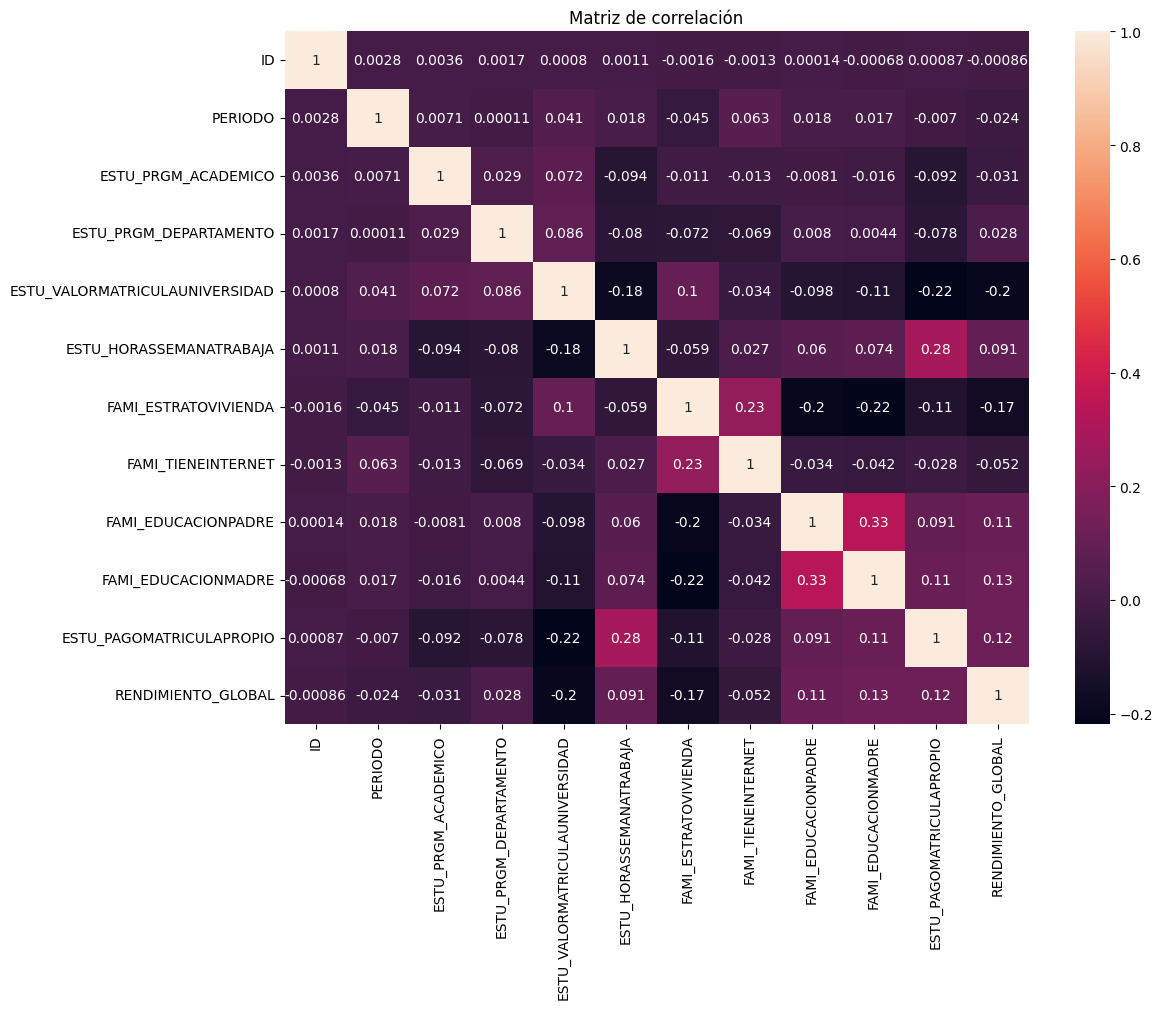

In [37]:
plt.figure(figsize=(12, 9))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de correlación")
plt.show()

Ahora para identificar las caracteristicas más importantes para el modelo

In [38]:
target_corr_df = pd.DataFrame(corr_matrix["RENDIMIENTO_GLOBAL"].sort_values(ascending=False))
target_corr_df

,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.000000
FAMI_EDUCACIONMADRE,0.126908
ESTU_PAGOMATRICULAPROPIO,0.118409
FAMI_EDUCACIONPADRE,0.113644
ESTU_HORASSEMANATRABAJA,0.090958
ESTU_PRGM_DEPARTAMENTO,0.028170
ID,-0.000860
PERIODO,-0.023727
ESTU_PRGM_ACADEMICO,-0.031079
FAMI_TIENEINTERNET,-0.052042


Observando así que las variables más importantes son: el estrato de la vivienda, el valor de la matrícula y el nivel de educación de la madre

## 2. Preprocesamiento de datos

Primero vamos observamos la cantidad de valores unicos en las variables categóricas, si estas son más de 10 o 12 se separan en diferentes columnas para no afectar el aprendizaje del modelo.

In [160]:
df = pd.read_csv("data/train.csv")
df = fill_na(df)

In [146]:
def unique_values(df, target):
    #Seleccionamos las columnas categóricas
    categorical_columns = df.select_dtypes(include=["object", "category"]).columns
    categorical_columns = categorical_columns.drop(target)
    #Obtenemos la cantidad de valores únicos por columna
    un_values = {col: df[col].nunique() for col in categorical_columns}
    #Creamos un dataframe con los valores únicos
    un_values_df = pd.DataFrame(list(un_values.items()), columns=["Column", "Unique values"])
    #Ordenamos de manera descendente
    un_values_df = un_values_df.sort_values(by="Unique values", ascending=False)
    un_values_df = un_values_df.reset_index(drop=True)
    return un_values_df

unique_df = unique_values(df, "RENDIMIENTO_GLOBAL")
unique_df

,Column,Unique values
0,ESTU_PRGM_ACADEMICO,948
1,ESTU_PRGM_DEPARTAMENTO,31
2,FAMI_EDUCACIONPADRE,12
3,FAMI_EDUCACIONMADRE,12
4,ESTU_VALORMATRICULAUNIVERSIDAD,8
5,FAMI_ESTRATOVIVIENDA,7
6,ESTU_HORASSEMANATRABAJA,5
7,FAMI_TIENEINTERNET,2
8,ESTU_PAGOMATRICULAPROPIO,2


Así entonces no nos centraremos en ESTU_PRGM_ACADEMICO, esta variable será convertida con un encoder y normalizada. Además se puede reducir con el uso de un LLM para clasificarlo por facultades por ejemplo. por otra parte el departamento se puede reducir a regiones. Por lo consiguiente para las otras variables pueden ser separadas en diferentes columnas.

### 2.1 Transformación de datos

### 2.2 Transformación de ESTU_PRGM_ACADEMICO

In [45]:
from transformers import pipeline
import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import os
#Cargamos un modelo de clasificación de texto
#La ventaja de usar pipeline es que no se requiere establecer el tokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"
classifier = pipeline("zero-shot-classification",
                      model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli", device=device)

#Definimos las categorías

categories = ["ciencias", "ingeniería", "arte", "salud", "economía", "derecho", "educación", "humanidades", "agropecuaria", "investigación", "administración"]

#Definimos un dataset para mejorar la eficiencia de la gpu
class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        return self.texts[idx]

#Obtenemos las categorías de cada programa académico
df_class = df["ESTU_PRGM_ACADEMICO"].unique()


#Definimos un dataloader, el batch_size se establece en 948 para evitar problemas de memoria
dataloader = DataLoader(TextDataset(df_class), batch_size=948, shuffle=False)

#Definimos un diccionario para almacenar los resultados
results = {}
#Iteramos sobre el dataloader
for batch in tqdm(dataloader):
    #Obtenemos las predicciones
    pred = classifier(batch, categories)
    #Almacenamos los resultados
    for i, p in enumerate(pred):
        results[p["sequence"]] = p["labels"][0]

results

100%|██████████| 1/1 [01:50<00:00, 110.99s/it]


{'ENFERMERIA': 'salud',
 'DERECHO': 'derecho',
 'MERCADEO Y PUBLICIDAD': 'administración',
 'ADMINISTRACION DE EMPRESAS': 'administración',
 'PSICOLOGIA': 'salud',
 'MEDICINA VETERINARIA': 'salud',
 'INGENIERIA MECANICA': 'ingeniería',
 'ADMINISTRACIÓN EN SALUD OCUPACIONAL': 'administración',
 'INGENIERIA INDUSTRIAL': 'ingeniería',
 'ADMINISTRACIÓN FINANCIERA': 'administración',
 'HOTELERIA Y TURISMO': 'humanidades',
 'LICENCIATURA EN CIENCIAS SOCIALES': 'humanidades',
 'LICENCIATURA EN PEDAGOGIA INFANTIL': 'educación',
 'COMUNICACION SOCIAL': 'humanidades',
 'CIENCIA POLITICA': 'ciencias',
 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL': 'administración',
 'MAESTRO EN MÚSICA': 'humanidades',
 'INGENIERIA MECATRONICA': 'ingeniería',
 'TRABAJO SOCIAL': 'humanidades',
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL': 'ciencias',
 'INGENIERIA CIVIL': 'ingeniería',
 'CONTADURIA PÚBLICA': 'administración',
 'ADMINISTRACION EN SALUD': 'administración',
 'ADMINISTRACIÓN DE EMPRE

In [91]:
#Definimos una función que asigna la categoría a cada programa académico
def assign_category(x):
    return results[x]

#Aplicamos la función a la columna ESTU_PRGM_ACADEMICO
df["class_label"] = df["ESTU_PRGM_ACADEMICO"].apply(assign_category)
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,VAL_REND,class_label
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Entre 5.5 millones y menos de 7 millones,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,3,salud
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Entre 2.5 millones y menos de 4 millones,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,1,derecho
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Entre 2.5 millones y menos de 4 millones,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,1,administración
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Entre 4 millones y menos de 5.5 millones,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,4,administración
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Entre 2.5 millones y menos de 4 millones,Si,Primaria completa,Primaria completa,No,medio-bajo,2,salud


Adicional a esto podemos observar como se distribuyen los datos con las nuevas clases

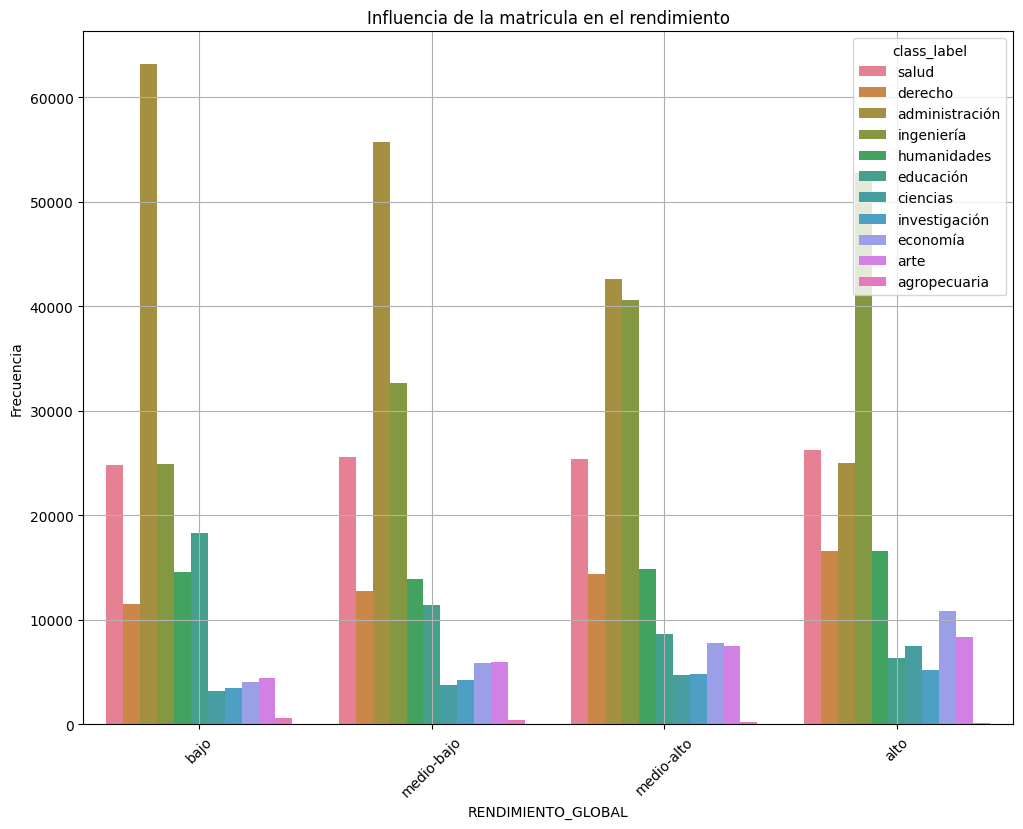

In [92]:
plot_distribution(df, "RENDIMIENTO_GLOBAL", "class_label", "Influencia de la categoría de la carrera en el rendimiento")

De esta gráfica podemos intuir que las areas relacionadas a administración, educación y agropecuaria tienen un peor desempeño en las pruebas, mientras que ingeniería, derecho, economía y arte tienen un mejor desempeño. Por otra parte el area de la salud y humanidades se mantiene constante en cada apartado de rendimiento. 

También podemos observar como afecta a una matriz de correlación esta nueva clase

In [164]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == "object" or "category":
        df_encoded[column] = encoder.fit_transform(df_encoded[column])

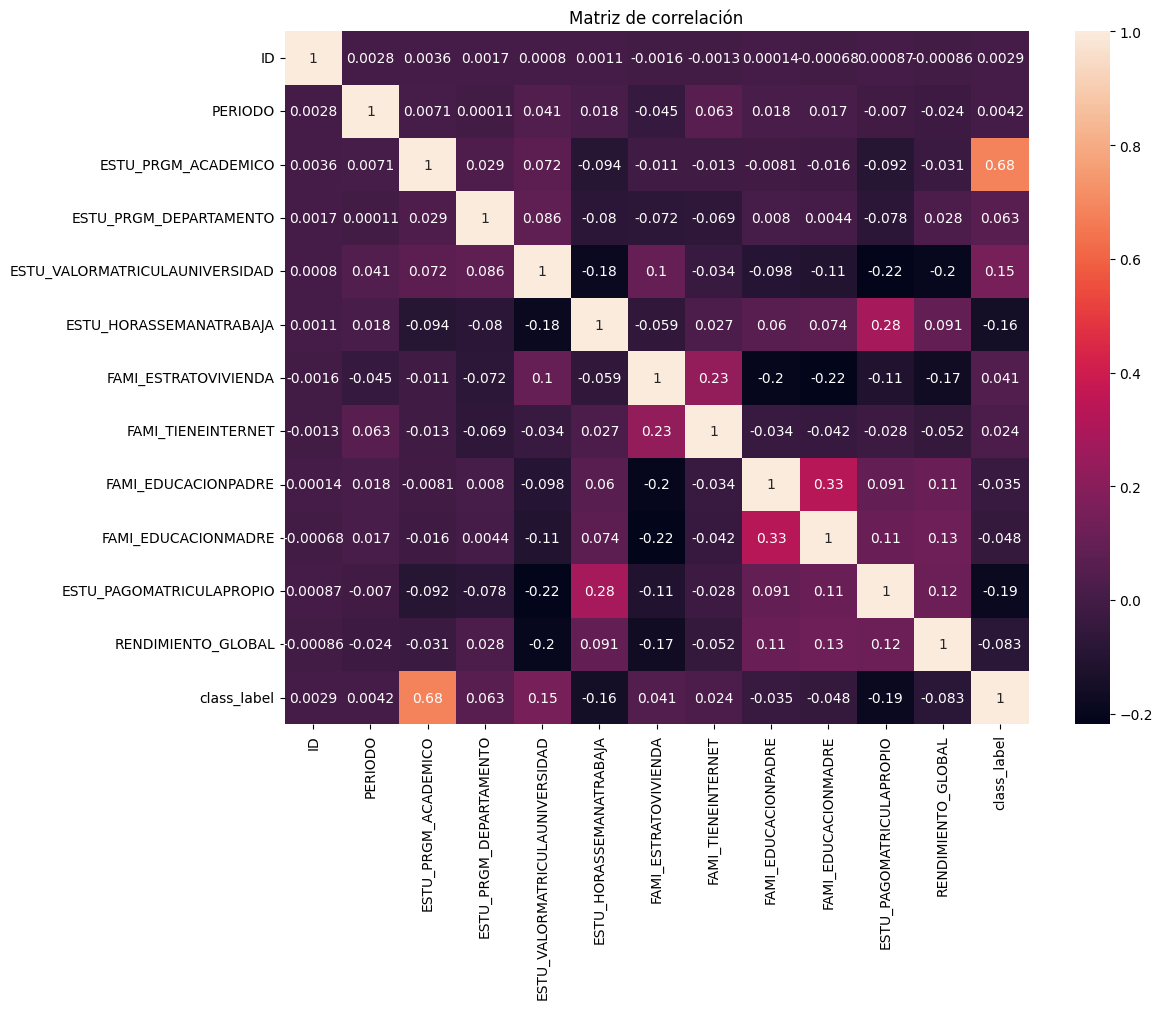

In [165]:
plt.figure(figsize=(12, 9))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de correlación")
plt.show()

In [166]:
target_corr_df = pd.DataFrame(corr_matrix["RENDIMIENTO_GLOBAL"].sort_values(ascending=False))
target_corr_df

,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.000000
FAMI_EDUCACIONMADRE,0.126908
ESTU_PAGOMATRICULAPROPIO,0.118409
FAMI_EDUCACIONPADRE,0.113644
ESTU_HORASSEMANATRABAJA,0.090958
ESTU_PRGM_DEPARTAMENTO,0.028170
ID,-0.000860
PERIODO,-0.023727
ESTU_PRGM_ACADEMICO,-0.031079
FAMI_TIENEINTERNET,-0.052042


Comparados con otros valores no tiene mucha influencia en la variable de rendimiento, pero más sin embargo es mejor que su relación con el de programa académico. Con una diferencia aproximada de 0.05.

In [48]:
#Guardamos el diccionario para luego usarlo en el test
import json
with open("data/class_labels.json", "w", encoding="utf-8") as f:
    json.dump(results, f)

Aplicamos el mismo proceso a el set de test

In [96]:
df_test = pd.read_csv("data/test.csv")

df_class = df_test["ESTU_PRGM_ACADEMICO"].unique()


#Definimos un dataloader, el batch_size se establece en 948 para evitar problemas de memoria
dataloader = DataLoader(TextDataset(df_class), batch_size=948, shuffle=False)

#Definimos un diccionario para almacenar los resultados
results = {}
#Iteramos sobre el dataloader
for batch in tqdm(dataloader):
    #Obtenemos las predicciones
    pred = classifier(batch, categories)
    #Almacenamos los resultados
    for i, p in enumerate(pred):
        results[p["sequence"]] = p["labels"][0]

results

100%|██████████| 1/1 [01:48<00:00, 108.76s/it]


{'TRABAJO SOCIAL': 'humanidades',
 'ADMINISTRACION COMERCIAL Y DE MERCADEO': 'administración',
 'INGENIERIA MECATRONICA': 'ingeniería',
 'CONTADURIA PUBLICA': 'administración',
 'ADMINISTRACION DE EMPRESAS': 'administración',
 'ADMINISTRACION AGROPECUARIA': 'administración',
 'INGENIERIA CIVIL': 'ingeniería',
 'INGENIERÍA MECÁNICA': 'ingeniería',
 'INGENIERÍA DE SISTEMAS': 'ingeniería',
 'ECONOMIA': 'economía',
 'INGENIERIA INDUSTRIAL': 'ingeniería',
 'PSICOLOGIA': 'salud',
 'NEGOCIOS INTERNACIONALES': 'economía',
 'ARQUITECTURA': 'arte',
 'INGENIERIA ELECTRICA': 'ingeniería',
 'SEGURIDAD Y SALUD EN EL TRABAJO': 'humanidades',
 'INGENIERIA DE SOFTWARE': 'ingeniería',
 'ADMINISTRACION DE NEGOCIOS': 'administración',
 'MEDICINA VETERINARIA Y ZOOTECNIA': 'salud',
 'DERECHO': 'derecho',
 'INGENIERIA MECANICA': 'ingeniería',
 'ADMINISTRACIÓN DE EMPRESAS': 'administración',
 'PSICOLOGÍA': 'salud',
 'INGENIERIA AMBIENTAL': 'ingeniería',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES

In [97]:
with open("data/class_labels_test.json", "w", encoding="utf-8") as f:
    json.dump(results, f)

En el caso de este set llenamos los valores faltantes con la moda del dataset original al no poder discriminarlos por el rendimiento global

In [59]:
df_mode = df_test.mode().iloc[0]

df_test = df_test.fillna(df_mode)

df_test.isna().sum()

Unnamed: 0                        0
ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
class_labels                      0
dtype: int64

Volvemos a realizar la extracción de valores únicos con la idea de expandir los valores que contengan menos de 13 valores y transformar y normalizar los superiores a estos

In [164]:
unique_df= unique_values(df, "RENDIMIENTO_GLOBAL")
unique_df

,Column,Unique values
0,ESTU_PRGM_ACADEMICO,948
1,ESTU_PRGM_DEPARTAMENTO,31
2,FAMI_EDUCACIONPADRE,12
3,FAMI_EDUCACIONMADRE,12
4,class_labels,10
5,ESTU_VALORMATRICULAUNIVERSIDAD,8
6,FAMI_ESTRATOVIVIENDA,7
7,ESTU_HORASSEMANATRABAJA,5
8,FAMI_TIENEINTERNET,2
9,ESTU_PAGOMATRICULAPROPIO,2


### 2.3 Transformación de columnas con pocos valores únicos

In [165]:
df = df.drop(columns=["ID"])
expand_col = unique_df[unique_df["Unique values"] < 13]["Column"].values
df = pd.get_dummies(df, columns=expand_col)
df

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,...,FAMI_ESTRATOVIVIENDA_Sin Estrato,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,medio-alto,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
1,20212,DERECHO,ATLANTICO,bajo,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,bajo,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,alto,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,True,False
4,20212,PSICOLOGIA,ANTIOQUIA,medio-bajo,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,medio-alto,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
692496,20212,PSICOLOGIA,NORTE SANTANDER,bajo,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,medio-bajo,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
692498,20195,PSICOLOGIA,TOLIMA,bajo,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


### 2.4 Codificación de variables categóricas con muchos valores únicos y normalización

In [166]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import joblib

#Iniciamos con el target

t_encoder = LabelEncoder()

df["RENDIMIENTO_GLOBAL"] = t_encoder.fit_transform(df["RENDIMIENTO_GLOBAL"])

#Guardamos el encoder
joblib.dump(t_encoder, "data/target_encoder.pkl")

columns = ["ESTU_PRGM_ACADEMICO", "ESTU_PRGM_DEPARTAMENTO"]
encoder = ce.TargetEncoder(cols=columns)



#Codificamos las columnas
x = df[columns]
y = df["RENDIMIENTO_GLOBAL"]


encoder.fit(x, y)

#Guardamos el encoder
joblib.dump(encoder, "data/program_encoder.pkl")
df_col = encoder.transform(x[columns])
df_col.head()


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO
0,1.662742,1.458950
1,1.441590,1.481302
2,1.741652,1.458950
3,1.622211,1.404329
4,1.543373,1.407370


In [167]:
for col in columns:
    df[col] = df_col[col]

df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,...,FAMI_ESTRATOVIVIENDA_Sin Estrato,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20212,1.662742,1.458950,2,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
1,20212,1.441590,1.481302,1,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,20203,1.741652,1.458950,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,20195,1.622211,1.404329,0,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,True,False
4,20212,1.543373,1.407370,3,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False


Nos aseguramos que la distribución de los datos se vea normal

In [107]:
from scipy import stats

def plot_distribution(df, columns):
    fig, axes = plt.subplots(figsize=(19, 9), ncols=len(columns), nrows=1)
    fig.suptitle("Distribución de las columnas")

    for i, column in enumerate(columns):
        ax = axes[i]
        #Creamos el histograma
        sns.histplot(df[column], kde=False, stat="density", label=column, bins=10, ax=ax)
        #Obtenemos la media y la desviación estándar
        mean = df[column].mean()
        std = df[column].std()
        #Creamos una distribución normal
        x = np.linspace(df[column].min(), df[column].max(), 100)
        y = stats.norm.pdf(x, mean, std)
        #Graficamos la distribución normal
        ax.plot(x, y,"k", label="Distriución normal")
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
        ax.tick_params(axis="x", rotation=45)
        ax.grid()
        ax.legend()
    
    plt.show()

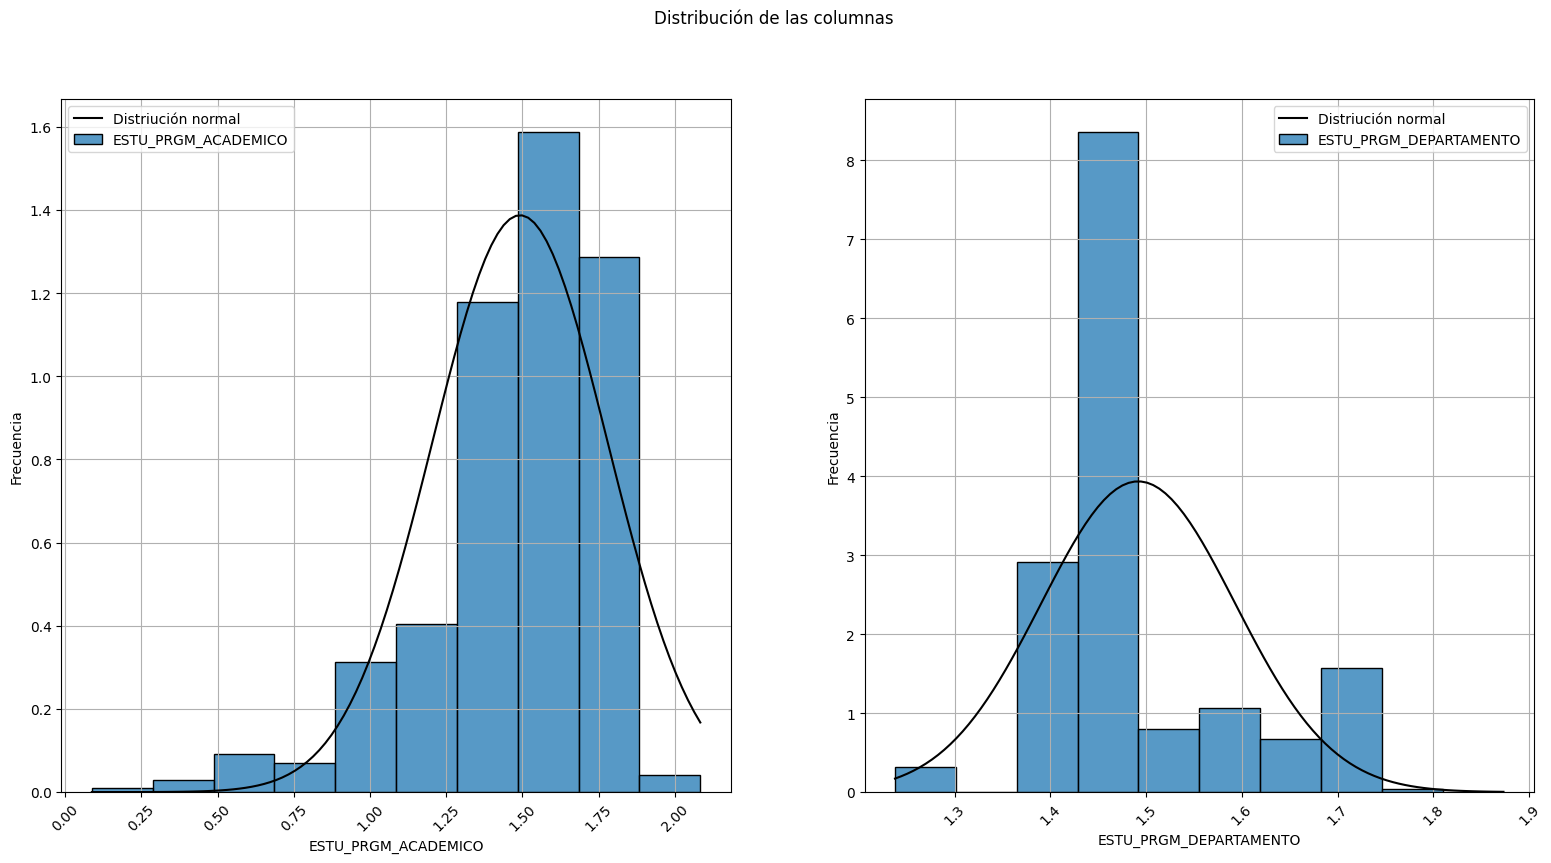

In [108]:
columns = ["ESTU_PRGM_ACADEMICO", "ESTU_PRGM_DEPARTAMENTO"]

plot_distribution(df, columns)

En sendos casos la distribución se asemeja a una distribución normal.

In [169]:
# #Guardamos los datos
df.to_csv("data/train_preprocessed.csv", index=False)

## 3.1 Entrenamiento de modelos

Al ser un modelo de clasificación usaremos modelos para esta tarea, primero definiremos las métricas. Al no haber mayor presencia de una clase u otra se puede usar accuracy, F1, Recall y precision. Además de ir guardando la información para su comparación con otros modelos.

In [110]:
import pandas as pd

df = pd.read_csv("data/train_preprocessed.csv")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test, scores = None):  
    
    y_pred= model.predict(X_test)
    #Determinamos las métricas de evaluación
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro")

    #Se adiciona el caso donde el resultado no provenga dun cross_val
    if scores:
        cross_val_mean = scores["test_score"].mean()
        cross_val_std = scores["test_score"].std()
    else:
        cross_val_mean = np.nan
        cross_val_std = np.nan

    
    result_df = pd.DataFrame(
        data=[[model_name, accuracy, f1, recall, precision, cross_val_mean, cross_val_std]], 
        columns=["Model", "Accuracy", "F1", "Recall", "Precision", "Cross_val_promedio", "Cross_val_std"])
    return result_df

### 3.1.1 Separación de train y test

In [191]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["RENDIMIENTO_GLOBAL"])
y = df["RENDIMIENTO_GLOBAL"]

test_size = 0.3
val_size = test_size / (1 - test_size)
#Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=23)


print(f"Train size: {X_train.shape}, test size{X_test.shape}")
print(f"Val size:{val_size * 100: .2f} % de set de entrenamiento")

Train size: (484750, 61), test size(207750, 61)
Val size: 42.86 % de set de entrenamiento


### 3.1.2 Entrenamiento

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit


#Inicializamos el modelo
#Se usan todos los procesadores disponibles para incrementar la velocidad de entrenamiento
estimator = RandomForestClassifier(random_state=23, n_jobs=-1)

#Usamos el cross validation para evaluar el modelo
#Agregamos un shufflesplit para evitar el overfitting

scores = cross_validate(estimator, X_train, y_train, cv=ShuffleSplit(10, test_size=val_size),
                                   scoring="accuracy", verbose=2)

print(f"Accuracy: {scores["test_score"].mean():.2f} +/- {scores["test_score"].std():.2f}")

estimator.fit(X_train, y_train)

#Recordemos que los resultados son a base del test
result_df = train_test_evaluate("Random Forest inicial", estimator, X_train, y_train, X_test, y_test, scores)
result_df

[CV] END .................................................... total time=   9.7s
[CV] END .................................................... total time=   9.1s
[CV] END .................................................... total time=   8.2s
[CV] END .................................................... total time=   9.0s
[CV] END .................................................... total time=   8.5s
[CV] END .................................................... total time=  10.0s
[CV] END .................................................... total time=   9.6s
[CV] END .................................................... total time=   8.5s
[CV] END .................................................... total time=   8.4s
[CV] END .................................................... total time=   8.2s
Accuracy: 0.41 +/- 0.00


,Model,Accuracy,F1,Recall,Precision,Cross_val_promedio,Cross_val_std
0,Random Forest inicial,0.407187,0.40107,0.406602,0.397973,0.405822,0.001224


### 3.1.3 Curva de aprendizaje

In [ ]:
from sklearn.model_selection import learning_curve

estimator = RandomForestClassifier(random_state=23, n_jobs=-1)


#Probar con log_loss
def lc_plot(estimator,X,y, val_size):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes= [0.3, 0.5, 0.7, 0.9], 
                 scoring ="accuracy", cv = ShuffleSplit(n_splits=10, test_size=val_size), verbose=1)

    train_mean = np.mean(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)

    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
    plt.plot(train_sizes, valid_mean, color="g", label="Cross-validation score")

    plt.grid()
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return plt

[learning_curve] Training set sizes: [ 83099 138499 193899 249299]


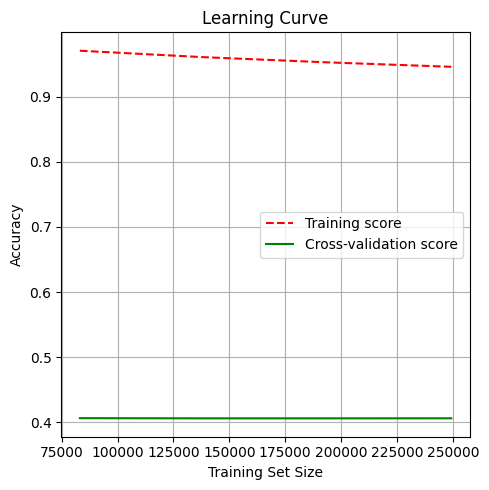

In [196]:
lc_plot(estimator, X_train, y_train, val_size)
plt.show()

En este caso podemos observar un caso de underfitting por parte del modelo, a mayor cantidad de datos de entrenamiento decae su accuracy, siendo propenso a no generalizar correctamente la información.

## 3.2 Mejora de hiperparametros

Mediante una búsqueda de hiperparametros usando una métrica como método de sesgo podemos evaluar y definir cuales son los mejores hiperparametros para un modelo definido. en este caso usaremos grid search definiendo rangos de hiperparametros. 

In [173]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(random_state=23)
parametros = {
    "n_estimators": list(range(20, 61, 20)),
    "max_depth": list(range(10, 101, 30)),
    "min_samples_leaf": list(range(1, 3)),
    "random_state": [23]
}

forest_reg = GridSearchCV(estimator = estimator,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 10, test_size=val_size), 
                        scoring = "accuracy",
                        verbose = 1,
                        n_jobs = -1
                        )

forest_reg.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [10, 40, 70, 100],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [20, 40, 60], 'random_state': [23]},
             scoring='accuracy', verbose=1)

In [174]:
best_params = forest_reg.best_params_
best_score = forest_reg.best_score_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor score: {best_score}")

estimator = forest_reg.best_estimator_

df_result_2 = train_test_evaluate("Random Forest optimizado", estimator, X_train, y_train, X_test, y_test)
df_result = pd.concat([result_df, df_result_2])
df_result

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 60, 'random_state': 23}
Mejor score: 0.4297543694133843


,Model,Accuracy,F1,Recall,Precision,Cross_val_promedio,Cross_val_std
0,Random Forest inicial,0.407191,0.401075,0.406607,0.397979,0.406205,0.000694
0,Random Forest optimizado,0.428515,0.407013,0.427674,0.407328,NaN,NaN


## 3.3 Adición de PCA

PCA o principal component analysis nos permite reducir las dimensiones del dataset mediante técnicas de proyecciones ortogonales y así poder evaluar si puede mejorar el entrenamiento

In [ ]:
from sklearn.decomposition import PCA, NMF
components = list(range(10, 51, 10))
perf_pca = []

for i in components:
    #Establecemos el número de componentes
    pca = PCA(n_components = i)
    #Transformamos los datos
    X_t = pca.fit_transform(X)
    #Generamos un nuevo dataset
    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)

    Rdm_forest = RandomForestClassifier(n_estimators =forest_reg.best_params_["n_estimators"] 
                                   ,max_depth = forest_reg.best_params_["max_depth"],
                                   min_samples_leaf=forest_reg.best_params_["min_samples_leaf"]
                                   ,random_state=forest_reg.best_params_["random_state"], n_jobs=-1)
    print (Xtv.shape, Xts.shape)
    #Entrenamos el modelo
    Rdm_forest.fit(Xtv, ytv)
    #Guardamos el accuracyc
    y_pred = Rdm_forest.predict(Xts)
    perf_pca.append(accuracy_score(yts , y_pred))
    print('Accuracy del modelo con ', i ,'elementos: ',"{:.5f}".format(accuracy_score(yts , y_pred)))
    print('------------')

print('Mejor accuracy: ',"{:.5f}".format(np.max(perf_pca)),'  ; obtenido con ',components[np.argmax(perf_pca)],' componentes para PCA')

(484750, 10) (207750, 10)
Accuracy del modelo con  10 elementos:  0.41446
------------
(484750, 20) (207750, 20)
Accuracy del modelo con  20 elementos:  0.41523
------------
(484750, 30) (207750, 30)
Accuracy del modelo con  30 elementos:  0.41853
------------
(484750, 40) (207750, 40)
Accuracy del modelo con  40 elementos:  0.42253
------------
(484750, 50) (207750, 50)
Accuracy del modelo con  50 elementos:  0.42605
------------


### 3.3.1 Adición de NFM

Se eliminan las columnas con valores negativos

In [176]:
numeric_columns = X.select_dtypes(include=[np.number])
negative_columns = numeric_columns.columns[numeric_columns.lt(0).any()]
x2=X.drop(negative_columns,axis=1)

In [ ]:
perf_nmf = []
for i in components:
    nmf = NMF(n_components = i,max_iter=1000)
    X_t = nmf.fit_transform(x2)
    
    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)
    print (Xtv.shape, Xts.shape)

    Rdm_forest = RandomForestClassifier(n_estimators =forest_reg.best_params_["n_estimators"] 
                                   ,max_depth = forest_reg.best_params_["max_depth"],
                                   min_samples_leaf=forest_reg.best_params_["min_samples_leaf"]
                                   ,random_state=forest_reg.best_params_["random_state"], n_jobs=-1)
    
    Rdm_forest.fit(Xtv, ytv)
    y_pred = Rdm_forest.predict(Xts)
    perf_nmf.append(accuracy_score(yts , y_pred))
    print('RMSE del modelo con ', i ,'elementos: ',"{:.5f}".format(accuracy_score(yts , y_pred)))
    print('------------')

print('Mejor accuracy: ',"{:.5f}".format(np.max(perf_nmf)),'  ; obtenido con ',components[np.argmax(perf_nmf)],' componentes para NMF')

(484750, 10) (207750, 10)
RMSE del modelo con  10 elementos:  0.38142
------------
(484750, 20) (207750, 20)
RMSE del modelo con  20 elementos:  0.41331
------------
(484750, 30) (207750, 30)
RMSE del modelo con  30 elementos:  0.38444
------------
(484750, 40) (207750, 40)
RMSE del modelo con  40 elementos:  0.39253
------------
(484750, 50) (207750, 50)
RMSE del modelo con  50 elementos:  0.38952
------------
Mejor RMSE:  0.41331   ; obtenido con  20  componentes para NMF


## 3.4 Predicciones

Como se tiene un dataset de validación se debe realizar su respectiva validación, usando las técnicas anteriormente aplicadas.

In [97]:
val_df = pd.read_csv("data/test.csv")
del val_df["Unnamed: 0"]
idx = val_df["ID"]

val_df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No


### 3.4.1 Transformación

In [98]:
val_df = val_df.drop(columns=["ID"])
expand_col = unique_df[unique_df["Unique values"] < 13]["Column"].values
val_df = pd.get_dummies(val_df, columns=expand_col)
val_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,...,FAMI_ESTRATOVIVIENDA_Sin Estrato,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20183,TRABAJO SOCIAL,BOLIVAR,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,20212,INGENIERIA MECATRONICA,BOGOTÁ,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,20195,CONTADURIA PUBLICA,SUCRE,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False


In [99]:
x = df[columns]

encoder = joblib.load("data/program_encoder.pkl")

df_val_col = encoder.transform(x)
df_val_col.head()

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO
0,1.662742,1.458950
1,1.441590,1.481302
2,1.741652,1.458950
3,1.622211,1.404329
4,1.543373,1.407370


In [100]:
for col in columns:
    val_df[col] = df_val_col[col]
val_df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,...,FAMI_ESTRATOVIVIENDA_Sin Estrato,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20183,1.662742,1.458950,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,20203,1.441590,1.481302,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,20212,1.741652,1.458950,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,20195,1.622211,1.404329,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,20212,1.543373,1.407370,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False


In [101]:
y_pred = estimator.predict(val_df)

t_encoder = joblib.load("data/target_encoder.pkl")

y_pred = t_encoder.inverse_transform(y_pred)

In [102]:
#Se organiza el formato de la subida a kaggle
submission = pd.DataFrame({"ID": idx, "RENDIMIENTO_GLOBAL": y_pred})
submission.to_csv("data/submission.csv", index=False)

## 4.1 Creación de pipeline integrado

Ahora que tenemos un modelo entrenado y un algoritmo a seguir tanto para la el preprocesamiento podemos juntar todo en una serie de objetos para facilitar tanto el manejo de la información como un seguimiento de los resultados para ello comenzaremos con un objeto de preprocesamiento.

## 4.2 Preprocesamiento

In [106]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce


class PreprocessData():
    #Definimos el constructor
    def __init__(self, df, target, save_encoders=False, inference=False):
        self.original_df = df

        self.__df = df
        self.inference = inference
        self.__target = target

        if not self.inference:
            self.t_encoder = LabelEncoder()
        else:
            self.t_encoder = joblib.load("data/target_encoder.pkl")
        self.save_encoders__ = save_encoders

        self.null_data_df = self.null_data_info()

        
        self.fill_na()

        self.transform_big_data()

        self.unique_df__ = self.unique_values()

        self.df_expand()
        if not self.inference:
            self.encoder = ce.TargetEncoder(cols=self.columns)
        else:
            self.encoder = joblib.load("data/program_encoder.pkl")

        self.transform_data()

    def transform_data(self):
        #Codificamos el target
        if not self.inference:
            self.__df[self.__target] = self.t_encoder.fit_transform(self.__df[self.__target])
        #Codificamos las columnas
            x = self.__df.drop(columns=[self.__target])
            y = self.__df[self.__target]
            data = self.encoder.fit_transform(x, y)
            self.__df = pd.concat([data, y], axis=1)

            if self.save_encoders__:
                joblib.dump(self.t_encoder, "data/target_encoder.pkl")
                joblib.dump(self.encoder, "data/program_encoder.pkl")
            
            return
        
        self.__df = self.encoder.transform(self.__df)
        

    def fill_na(self):
        if self.inference:
            df_mode = self.__df.mode().iloc[0]
            self.__df = self.__df.fillna(df_mode)
            return

        modes = self.__df.groupby(self.__target,
                            observed=False).transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.nan)
        self.__df.fillna(modes, inplace=True)

    def null_data_info(self):
        total = self.__df.isnull().sum().sort_values(ascending=False)
        percent = (self.__df.isnull().sum() / self.__df.isnull().count() * 100).sort_values(ascending=False)
        missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])

        return missing

    def unique_values(self):
        categorical_columns = self.__df.select_dtypes(include=["object", "category"]).columns
        if not self.inference:
            categorical_columns = categorical_columns.drop(self.__target)
        un_values = {col: self.__df[col].nunique() for col in categorical_columns}
        un_values_df = pd.DataFrame(list(un_values.items()), columns=["Column", "Unique values"])
        un_values_df = un_values_df.sort_values(by="Unique values", ascending=False)
        un_values_df = un_values_df.reset_index(drop=True)

        return un_values_df

    def df_expand(self):
        expand_col = self.unique_df__[self.unique_df__["Unique values"] < 13]["Column"].values

        self.columns = self.unique_df__[self.unique_df__["Unique values"] > 13]["Column"].values
        self.__df = pd.get_dummies(self.__df, columns=expand_col)

    def get_transform_data(self):
        return self.__df
    
    def get_target(self):
        return self.__target

    def transform_big_data(self):
        #Por facilidad cargaremos el diccionario de los programas académicos
        #Aunque se trasformarían con el código anterior de la sección 2.2
        if not self.inference:
            with open("data/class_labels.json", "r", encoding="utf-8") as f:
                results = json.load(f)
        else:
            with open("data/class_labels_test.json", "r", encoding="utf-8") as f:
                results = json.load(f)

        #Para reducir el código se usa una función lambda
        self.__df["class_label"] = self.__df["ESTU_PRGM_ACADEMICO"].apply(lambda x: results[x])


df = pd.read_csv("data/train.csv")
df = df.drop(columns=["ID"])
data = PreprocessData(df, "RENDIMIENTO_GLOBAL", save_encoders=True)

df_transform = data.get_transform_data()
df_transform.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,...,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,RENDIMIENTO_GLOBAL
0,20212,1.662742,1.458950,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,2
1,20212,1.441590,1.481302,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,1
2,20203,1.741652,1.458950,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,1
3,20195,1.622211,1.404329,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,0
4,20212,1.543373,1.407370,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,True,False,3


In [107]:
test_df = pd.read_csv("data/test.csv")
test_df = test_df.drop(columns=["ID", "Unnamed: 0"])
test_data = PreprocessData(test_df, "RENDIMIENTO_GLOBAL", inference=True)
test_data.get_transform_data().head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,...,FAMI_ESTRATOVIVIENDA_Sin Estrato,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,20183,1.641652,1.576761,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,20203,1.759834,1.407370,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,20212,1.173698,1.458950,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,20195,1.751135,1.716855,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,20212,1.622211,1.481302,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False


## 4.4 Utilidades

In [111]:
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import learning_curve
import mlflow
import mlflow.sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA, NMF

class Utils():
    def __init__(self,all_models,all_params, X_train, y_train, X_test, y_test, val_size, n_jobs=-1, t_encoder=None, all_data=None):
        self.t_encoder = t_encoder
        self.n_jobs = n_jobs
        self.transform_df = all_data

        self.all_models = all_models
        self.all_params = all_params

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.val_size = val_size
        self.result_df = None


    def learning_curve(self):
        if hasattr(self.model, "n_jobs"):
            n_jobs = 1
        else:
            n_jobs = self.n_jobs
        train_sizes, train_scores, valid_scores = learning_curve(self.model, self.X_train, self.y_train, train_sizes= [0.1, 0.3, 0.5, 0.7, 0.9], 
                    scoring ="accuracy", cv = ShuffleSplit(n_splits=5, test_size=self.val_size), verbose=1, n_jobs=n_jobs)

        train_mean = np.mean(train_scores, axis=1)

        valid_mean = np.mean(valid_scores, axis=1)

        plt.subplots(1, figsize=(5,5))
        plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
        plt.plot(train_sizes, valid_mean, color="g", label="Cross-validation score")

        plt.grid()
        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show()

    def random_search(self):
        parametros = self.all_params[self.model_name]
        self.model_name = f"{self.model_name}_optimizado"

        with mlflow.start_run(run_name=self.model_name):
            #Lo cambiamos a random para reducir el coste computacional
            if hasattr(self.model, "n_jobs"):
                n_jobs = 1
            else:
                n_jobs = self.n_jobs
            model_reg = RandomizedSearchCV(estimator = self.model,
                                param_distributions = parametros,
                                cv = ShuffleSplit(n_splits= 5, test_size=self.val_size), 
                                scoring = "accuracy",
                                verbose = 1,
                                n_jobs = n_jobs,
                                n_iter=20)

            model_reg.fit(self.X_train, self.y_train)

            self.best_params = model_reg.best_params_
            self.best_score = model_reg.best_score_

            print(f"Mejores parámetros: {self.best_params}")
            print(f"Mejor score: {self.best_score}")

            self.model = model_reg.best_estimator_
            self.all_models[self.model_name] = self.model

            accuracy, f1, recall, precision = self.train_test_evaluate(self.model_name, self.model)
            #Agregamos los resultados a mlflow
            mlflow.log_param("Model", self.model_name)
            mlflow.log_metric("Accuracy", accuracy)
            mlflow.log_metric("F1", f1)
            mlflow.log_metric("Recall", recall)
            mlflow.log_metric("Precision", precision)
            #Guardamos el modelo
            mlflow.sklearn.log_model(self.model, self.model_name, registered_model_name=self.model_name)
            mlflow.end_run()

    
    def pca_analysis(self):

        components = list(range(10, 51, 10))
        perf_pca = []
        with mlflow.start_run(run_name=f"{self.model_name} PCA"):
            for i in components:
                pca = PCA(n_components = i)
                X_t = pca.fit_transform(self.X_train)
                Xtv, Xts, ytv, yts = train_test_split(X_t, self.y_train, test_size=self.val_size)

                self.model.fit(Xtv, ytv)
                y_pred = self.model.predict(Xts)
                perf_pca.append(accuracy_score(yts , y_pred))
                print('Accuracy del modelo con ', i , 'elementos: ', "{:.5f}".format(accuracy_score(yts , y_pred)))
                print('------------')
        best_accuracy = np.max(perf_pca)
        best_component = components[np.argmax(perf_pca)]

        #Realizamos el análisis con el mejor componente
        pca = PCA(n_components = best_component)
        X_t = pca.fit_transform(self.X_train)
        Xtv, Xts, ytv, yts = train_test_split(X_t, self.y_train, test_size=self.val_size)
        self.model.fit(Xtv, ytv)
        y_pred = self.model.predict(Xts)
        accuracy = accuracy_score(yts , y_pred)
        #Guardamos los resultados en mlflow
        mlflow.log_param("Best PCA components", best_component)
        mlflow.log_metric("Best PCA accuracy", best_accuracy)
        mlflow.log_metric("PCA accuracy", accuracy)
        mlflow.log_param("Model", self.model_name)
        mlflow.sklearn.log_model(self.model, f"{self.model_name}_PCA", registered_model_name=f"{self.model_name}_PCA")
        mlflow.end_run()
    def nmf_analysis(self):
        components = list(range(10, 51, 10))
        perf_nmf = []
        with mlflow.start_run(run_name=f"{self.model_name} NMF"):
            for i in components:
                nmf = NMF(n_components = i,max_iter=1000)
                X_t = nmf.fit_transform(self.X_train)
                Xtv, Xts, ytv, yts = train_test_split(X_t, self.y_train, test_size=self.val_size)

                self.model.fit(Xtv, ytv)
                y_pred = self.model.predict(Xts)
                perf_nmf.append(accuracy_score(yts , y_pred))
                print('Accuracy del modelo con ', i ,'elementos: ', "{:.5f}".format(accuracy_score(yts , y_pred)))
                print('------------')
        best_accuracy = np.max(perf_nmf)
        best_component = components[np.argmax(perf_nmf)]

        nmf = NMF(n_components = best_component,max_iter=1000)
        X_t = nmf.fit_transform(self.X_train)
        Xtv, Xts, ytv, yts = train_test_split(X_t, self.y_train, test_size=self.val_size)
        self.model.fit(Xtv, ytv)
        y_pred = self.model.predict(Xts)
        accuracy = accuracy_score(yts , y_pred)
        mlflow.log_param("Best NMF components", best_component)
        mlflow.log_metric("Best NMF accuracy", best_accuracy)
        mlflow.log_metric("NMF accuracy", accuracy)
        mlflow.log_param("Model", self.model_name)
        mlflow.sklearn.log_model(self.model, f"{self.model_name}_NMF", registered_model_name=f"{self.model_name}_NMF")
        mlflow.end_run()
    def confusion_matrix(self):

        y_pred = self.model.predict(self.X_test)
        cm = confusion_matrix(self.y_test, y_pred)
        plt.figure(figsize=(12, 12))
        plt.title(f"Matriz de confusión de {self.model_name}")
        sns.heatmap(cm, annot=True)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()
    
    def train_test_evaluate(self, model_name, model, scores = None):  
        
            y_pred= model.predict(self.X_test)
            #Guardamos el modelo dentro de la clase
            if model_name in self.all_models:
                self.all_models[model_name] = model
            
            accuracy = accuracy_score(self.y_test, y_pred)
            f1 = f1_score(self.y_test, y_pred, average="macro")
            recall = recall_score(self.y_test, y_pred, average="macro")
            precision = precision_score(self.y_test, y_pred, average="macro")

            if scores:
                cross_val_mean = scores["test_score"].mean()
                cross_val_std = scores["test_score"].std()
            else:
                cross_val_mean = np.nan
                cross_val_std = np.nan
            
            result_df = pd.DataFrame(
                data=[[model_name, accuracy, f1, recall, precision, cross_val_mean, cross_val_std]], 
                columns=["Model", "Accuracy", "F1", "Recall", "Precision", "Cross_val_promedio", "Cross_val_std"])
            if self.result_df is None:
                self.result_df = result_df
            else:
                self.result_df = pd.concat([self.result_df, result_df]).sort_values(by="Cross_val_promedio", ascending=False)
            
            if hasattr(self, "model_name"):
                self.all_models[self.model_name] = model
            
            return accuracy, f1, recall, precision
    
    def set_model(self, model_name):
        self.model = self.all_models[model_name]
        self.model_name = model_name
    
    def set_model_name(self, model_name):
        self.model_name = model_name

    def get_model(self):
        return self.model
    def get_result(self):
        return self.result_df
    def make_predictions(self, df):
        data = PreprocessData(df, None, inference=True)
        df = data.original_df
        data = data.get_transform_data()
        #Entrenamos el modelo con todo el dataset
        X = self.transform_df.drop(columns=["RENDIMIENTO_GLOBAL"])
        y = self.transform_df["RENDIMIENTO_GLOBAL"]
        self.model.fit(X, y)
        #Realizamos las predicciones
        pred = self.model.predict(data)
        pred = self.t_encoder.inverse_transform(pred)
        pred = pd.DataFrame(pred, columns=["RENDIMIENTO_GLOBAL"])
        df = pd.concat([df, pred], axis=1)
        return df
        

## 4.4 Modelos

In [103]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

class ModelCompose():
    def __init__(self, n_jobs=-1, random_state=23):
        self.models = {
            "LightGBM": lgb.LGBMClassifier(n_jobs=n_jobs, random_state=random_state, verbosity=-1),
            "GradientBoosting": GradientBoostingClassifier(random_state=random_state, verbose=0),
            "AdaBoost": AdaBoostClassifier(random_state=random_state),
            "RidgeClassifier": RidgeClassifier(random_state=random_state),
            "LDA": LinearDiscriminantAnalysis(),
            "LogisticRegression": LogisticRegression(n_jobs=n_jobs, random_state=random_state),
            "RandomForest": RandomForestClassifier(n_jobs=n_jobs, random_state=random_state),
            "QDA": QuadraticDiscriminantAnalysis(),
            "NaiveBayes": GaussianNB(),
            "KNeighbors": KNeighborsClassifier(n_jobs=n_jobs)
        }
        self.params = {
            "LightGBM": {
                "num_leaves": [31, 50, 100],
                "learning_rate": [0.01, 0.05, 0.1],
                "n_estimators": [100, 200, 500],
                "max_depth": [10, 20, -1],
                "min_child_samples": [20, 50, 100]
            },
            "GradientBoosting": {
                "learning_rate": [0.01, 0.05, 0.1],
                "n_estimators": [100, 200, 500],
                "max_depth": [3, 5, 10],
                "subsample": [0.8, 1.0],
                "min_samples_split": [2, 10, 50]
            },
            "AdaBoost": {
                "n_estimators": [50, 100, 200],
                "learning_rate": [0.01, 0.1, 1.0]
            },
            "RidgeClassifier": {
                "alpha": [0.1, 1.0, 10.0],
                "solver": ["auto", "svd", "cholesky"]
            },
            "LDA": {
                "solver": ["svd", "lsqr", "eigen"],
                "shrinkage": [None, "auto", 0.1, 0.5, 1.0]
            },
            "LogisticRegression": {
                "C": [0.01, 0.1, 1.0, 10.0],
                "solver": ["newton-cg", "lbfgs", "saga"],
                "penalty": ["l2", "none"],
                "max_iter": [100, 200, 500]
            },
            "RandomForest": {
                "n_estimators": [100, 200, 500],
                "max_depth": [10, 20, None],
                "min_samples_split": [2, 10, 50],
                "min_samples_leaf": [1, 5, 10],
                "bootstrap": [True, False]
            },
            "QDA": {
                "reg_param": [0.0, 0.1, 0.5, 1.0]
            },
            "NaiveBayes": {
                "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
            },
            "KNeighbors": {
                "n_neighbors": [3, 5, 10, 20],
                "weights": ["uniform", "distance"],
                "p": [1, 2]  # Distancia de Minkowski: 1 (Manhattan), 2 (Euclidiana)
            }
        }
    def get_models(self):
        return self.models
    
    def get_params(self):
        return self.params

## 4.4 Entrenamiento

In [112]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import mlflow
from IPython.display import clear_output
import mlflow.sklearn

class Training(PreprocessData, ModelCompose):
    def __init__(self, df, target, save_encoders=False, n_jobs=-1, test_split=0.3, random_state=23, val_size=0.2, n_jobs_model=-1):
        #Inicializamos las clases heredadas
        PreprocessData.__init__(self, df, target, save_encoders)
        ModelCompose.__init__(self, n_jobs_model, random_state)
        self.random_state = random_state

        self.test_size = test_split
        self.val_size = val_size
        self.n_jobs = n_jobs
        self.train_split()
        print("Ejecutor creado exitosamente")
        display(self.create_info_df())
        print("Datos vacíos antes del preprocesamiento")
        display(self.null_data_df)

        self.utils = Utils(self.get_models(), self.get_params() 
                           ,self.X_train, self.y_train,
                             self.X_test, self.y_test, self.val_size,
                               self.n_jobs, self.t_encoder, self.get_transform_data())
    

    def train_split(self):
        X = self.get_transform_data().drop(columns=[self.get_target()])
        y = self.get_transform_data()[self.get_target()]
        #Dividimos los datos en entrenamiento y prueba
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.test_size, random_state=23)
    
    def initial_fit(self):
        print("Iniciando el entrenamiento")
        #Se usa de forma manual para evitar que se borre con la celda
        progress = tqdm(total=len(list(self.get_models().items())), desc="Entrenando modelos", leave=True)
        results_display = None

        for model_name, model in self.get_models().items():
            with mlflow.start_run(run_name=model_name):
                progress.set_postfix_str(f"Entrenando modelo {model_name}")
                #Entrenamos el modelo y obtenemos los resultados
                self.train_model(model_name, model)
                #Actualizamos el display de los resultados para que sea aparte de los mensajes de los modelos
                if results_display is None:
                    results_display = display(self.utils.get_result())
                else:
                    update_display(self.utils.get_result(), display_id=results_display)

                progress.update(1)
                progress.set_postfix_str(f"Modelo {model_name} entrenado exitosamente")
        
        clear_output()

        display(self.utils.get_result())
        mlflow.end_run()
        progress.close()    
    
    def train_model(self,model_name, model):
            #Así se evita que se use todos los procesadores 2 veces
            if hasattr(model, "n_jobs"):
                n_jobs = 1
            else:
                n_jobs = self.n_jobs
            scores = cross_validate(model, self.X_train, self.y_train, cv=ShuffleSplit(10, test_size=self.val_size, random_state=self.random_state),
                                scoring="accuracy", verbose=0, n_jobs=n_jobs)
            model.fit(self.X_train, self.y_train)
            accuracy, f1, recall, precision = self.utils.train_test_evaluate(model_name, model, scores)


            #Agregamos los resultados a mlflow
            mlflow.log_param("Model", model_name)
            mlflow.log_metric("Accuracy", accuracy)
            mlflow.log_metric("F1", f1)
            mlflow.log_metric("Recall", recall)
            mlflow.log_metric("Precision", precision)
            #Guardamos el modelo
            mlflow.sklearn.log_model(model, model_name, registered_model_name=model_name)
    
    def get_model(self, name, train=True):
        model = self.get_models().get(name)
        if model is None:
            keys = self.get_models().keys()
            print(f"El modelo seleccionado no existe usar: \n {keys}")
            return
        #Establecemos el modelo en el wrapper de utilidades
        self.utils.set_model(name)
        #Si solo se quiere entrenar un modelo se puede usar el parámetro train
        if train:
            self.train_model(name, model)
            mlflow.end_run()
        
        display(self.utils.get_model())
        
        #Devolvemos el modelo en el wrapper de utilidades
        return self.utils
    
    def create_info_df(self):
        models_data = list(self.get_models().keys())
        data = {"Tamaño de entrenamiento": [self.X_train.shape], "Tamaño de prueba": [self.X_test.shape], "Tamaño de validación": [self.val_size],
                "Modelos para entrenar": [models_data], "Target": [self.get_target()], "Dataset original": [self.original_df.shape]}
        return pd.DataFrame.from_dict(data, orient="index", columns=["Información"])
        
df = pd.read_csv("data/train.csv")
df = df.drop(columns=["ID"])
train = Training(df, "RENDIMIENTO_GLOBAL", save_encoders=True)

Ejecutor creado exitosamente


,Información
Tamaño de entrenamiento,"(484750, 62)"
Tamaño de prueba,"(207750, 62)"
Tamaño de validación,0.2
Modelos para entrenar,"[LightGBM, GradientBoosting, AdaBoost, RidgeCl..."
Target,RENDIMIENTO_GLOBAL
Dataset original,"(692500, 12)"


Datos vacíos antes del preprocesamiento


,Total,Percent
FAMI_ESTRATOVIVIENDA,32137,4.640722
ESTU_HORASSEMANATRABAJA,30857,4.455884
FAMI_TIENEINTERNET,26629,3.845343
FAMI_EDUCACIONMADRE,23664,3.417184
FAMI_EDUCACIONPADRE,23178,3.347004
ESTU_PAGOMATRICULAPROPIO,6498,0.938339
ESTU_VALORMATRICULAUNIVERSIDAD,6287,0.907870
PERIODO,0,0.000000
ESTU_PRGM_ACADEMICO,0,0.000000
ESTU_PRGM_DEPARTAMENTO,0,0.000000


In [113]:
#Vizualiación de la información transformada
train.get_transform_data().head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,...,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,RENDIMIENTO_GLOBAL
0,20212,1.662742,1.458950,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,2
1,20212,1.441590,1.481302,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,1
2,20203,1.741652,1.458950,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,1
3,20195,1.622211,1.404329,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,0
4,20212,1.543373,1.407370,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,True,False,3


In [114]:
#Ejemplo de búsqueda del mejor modelo
train.initial_fit()

,Model,Accuracy,F1,Recall,Precision,Cross_val_promedio,Cross_val_std
0,LightGBM,0.451533,0.437211,0.450812,0.435970,0.449501,0.001261
0,GradientBoosting,0.436140,0.422892,0.435423,0.421170,0.437457,0.001668
0,AdaBoost,0.421560,0.405369,0.420766,0.402968,0.422611,0.001554
0,RidgeClassifier,0.422084,0.394888,0.421154,0.399517,0.422597,0.001794
0,LDA,0.420452,0.413899,0.419898,0.412540,0.420839,0.002025
0,LogisticRegression,0.415110,0.399945,0.414379,0.397885,0.415451,0.001377
0,RandomForest,0.405776,0.399672,0.405190,0.396544,0.404644,0.001613
0,QDA,0.400501,0.370665,0.399591,0.377022,0.400992,0.001654
0,NaiveBayes,0.393632,0.364815,0.392725,0.368574,0.394600,0.001596
0,KNeighbors,0.387090,0.373521,0.386443,0.372808,0.385952,0.001639


In [71]:
#Entrenamiento un modelo en específico
model = train.get_model("LightGBM")

2024/12/08 01:37:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LightGBM' already exists. Creating a new version of this model...
Created version '25' of model 'LightGBM'.


LGBMClassifier(n_jobs=-1, random_state=23, verbosity=-1)

In [115]:
#Solo obtenemos el modelo
model = train.get_model("LightGBM", train=False)

LGBMClassifier(n_jobs=-1, random_state=23, verbosity=-1)

In [120]:
#Ejemplo de búsqueda de hiperparámetros
model.random_search()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'num_leaves': 100, 'n_estimators': 500, 'min_child_samples': 50, 'max_depth': 10, 'learning_rate': 0.05}
Mejor score: 0.4542093862815884


2024/12/08 13:42:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LightGBM_optimizado' already exists. Creating a new version of this model...
Created version '2' of model 'LightGBM_optimizado'.


In [88]:
#Podemos seleccionar otro modelo pero debe estar en la lista de modelos
model.set_model("LightGBM_optimizado")

In [121]:
#Para observar los resultados
model.result_df

,Model,Accuracy,F1,Recall,Precision,Cross_val_promedio,Cross_val_std
0,LightGBM,0.451533,0.437211,0.450812,0.435970,0.449501,0.001261
0,GradientBoosting,0.436140,0.422892,0.435423,0.421170,0.437457,0.001668
0,AdaBoost,0.421560,0.405369,0.420766,0.402968,0.422611,0.001554
0,RidgeClassifier,0.422084,0.394888,0.421154,0.399517,0.422597,0.001794
0,LDA,0.420452,0.413899,0.419898,0.412540,0.420839,0.002025
0,LogisticRegression,0.415110,0.399945,0.414379,0.397885,0.415451,0.001377
0,RandomForest,0.405776,0.399672,0.405190,0.396544,0.404644,0.001613
0,QDA,0.400501,0.370665,0.399591,0.377022,0.400992,0.001654
0,NaiveBayes,0.393632,0.364815,0.392725,0.368574,0.394600,0.001596
0,KNeighbors,0.387090,0.373521,0.386443,0.372808,0.385952,0.001639


In [74]:
#Ejemplo de análisis de componentes principales
model.pca_analysis()

Accuracy del modelo con  10 elementos:  0.41511
------------
Accuracy del modelo con  20 elementos:  0.41927
------------
Accuracy del modelo con  30 elementos:  0.42621
------------
Accuracy del modelo con  40 elementos:  0.43051
------------
Accuracy del modelo con  50 elementos:  0.43863
------------


2024/12/08 01:38:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LightGBM_PCA' already exists. Creating a new version of this model...
Created version '2' of model 'LightGBM_PCA'.


In [75]:
#Ejemplo de análisis de NMF
model.nmf_analysis()

Accuracy del modelo con  10 elementos:  0.39778
------------
Accuracy del modelo con  20 elementos:  0.40876
------------
Accuracy del modelo con  30 elementos:  0.41655
------------
Accuracy del modelo con  40 elementos:  0.41460
------------
Accuracy del modelo con  50 elementos:  0.41928
------------


2024/12/08 01:39:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LightGBM_NMF' already exists. Creating a new version of this model...
Created version '2' of model 'LightGBM_NMF'.


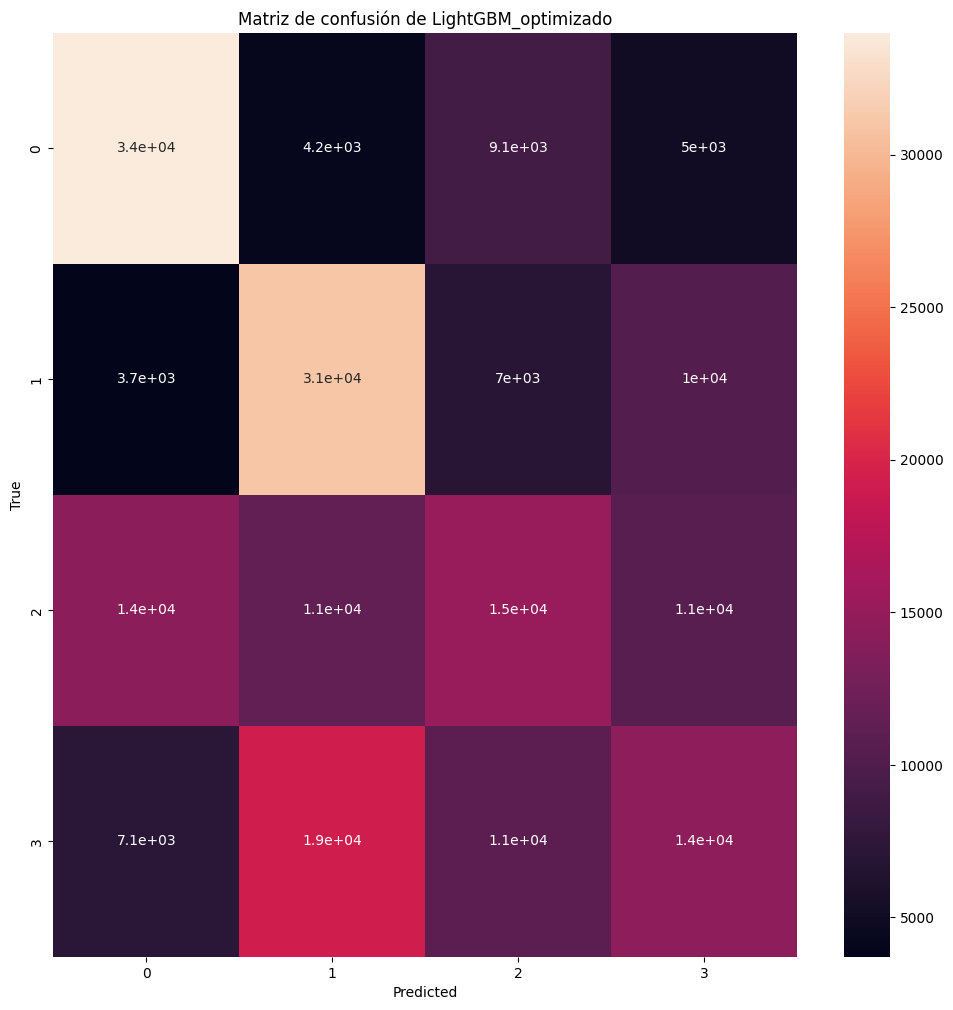

In [122]:
#Matriz de confusión
model.confusion_matrix()

El modelo tiene dificultades para especialmente las clases de medio-alto y medio-alto, esto puede ser debido a que en ambas de estas clases los valores más significativos son muy similares como se puede observar en el apartado 1.1.1. Dificultando así al modelo a predecir de una correcta manera estos datos.

[learning_curve] Training set sizes: [ 38780 116340 193900 271460 349020]


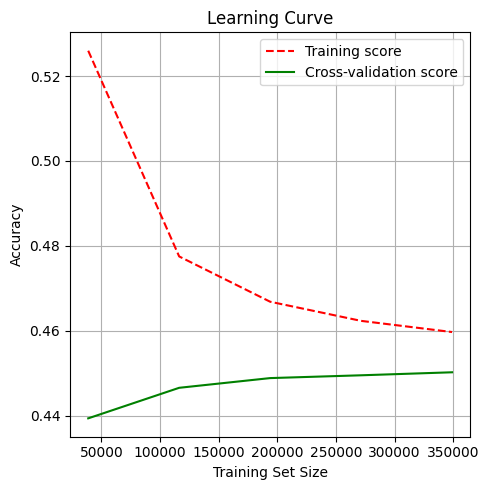

In [117]:
#Curva de aprendizaje
model.learning_curve()

De la curva podemos observar que pese a los datos a tener un underfitting debido a su poca exactitud a la hora de seleccionar las clases, le beneficia la cantidad de datos a la hora de su entrenamiento, observando que existe una posible convergencia en 45% lo cual puede ser lo máximo con el mejor modelo elegido.

In [118]:
#Ejemplo de predicción
df = pd.read_csv("data/test.csv")
idx = df["ID"]

df = df.drop(columns=["ID", "Unnamed: 0"])

#Devuelve todo el dataframe con las predicciones
df = model.make_predictions(df)
#Por eso se debe adicionar el ID ya que se elimino para ser preprocesado
df = pd.concat([idx, df], axis=1)
df = df[["ID", "RENDIMIENTO_GLOBAL"]]
df.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo


In [ ]:
#Guardamos el archivo
df.to_csv("data/submission.csv", index=False)

## 5 Conclusiones

Pese a no tener un buen resultado en las métricas, se pudo establecer un pipeline integrado para explorar distintos modelos del dataset integrando etapas de preprocesamiento con LLMs y numérico. Además de poder obtener graficos adicionales para poder determinar que modelo es el mejor para este dataset. 

## 6 Trabajos a futuro

Si bien es cierto que el pipeline es especifico para este dataset, la mayoría de cualidades como la transformación de muchos datos categóricos a numéricos normalizados o el agrupamiento y reemplazo de datos faltantes por clase ayudan a cualquier problema de machine learning. Así que se debería implementar soluciones más robustas que se puedan usar en otros datasets como por ejemplo problemas de regresión o de clasificación binaria. 

## 7 (Adicional) Deep Learning

También se realizaron pruebas con redes neuronales aunque estas no tuvieron resultados similares a los modelos de anteriores.

In [125]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm

In [124]:
train.get_transform_data().to_csv("data/train_preprocessed.csv", index=False)

In [128]:
dataset = pd.read_csv('data/train_preprocessed.csv')
dataset.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,...,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,RENDIMIENTO_GLOBAL
0,20212,1.662742,1.458950,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,2
1,20212,1.441590,1.481302,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,1
2,20203,1.741652,1.458950,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,1
3,20195,1.622211,1.404329,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,0
4,20212,1.543373,1.407370,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,True,False,3


In [129]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [157]:
import torch.utils
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score

#Transformamos los valores booleanos a enteros
for col in dataset.select_dtypes(include=['bool']).columns:
    dataset[col] = dataset[col].astype(int)

#Se separan los datos en de datos y target
x = dataset.drop('RENDIMIENTO_GLOBAL', axis=1).values
y = dataset['RENDIMIENTO_GLOBAL'].values

#Los datos se convierten a tensores
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

#Se separan los datos en entrenamiento y prueba
train_size = int(0.8 * len(x))
test_size = len(x) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(TensorDataset(x, y), [train_size, test_size], generator=torch.Generator().manual_seed(23))

#Se establece el tamaño del batch
batch_size = 65536

#Se cargan los datos
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



#Se define la arquitectura de la red neuronal
class NNModel(nn.Module):
    def __init__(self,input_layer, output_layer, hidden_layers = 20, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #La arquitectura tiene naturaleza cónica disminuyendo el número de neuronas
        #entre cada capa se disminuye a la mitad el número de neuronas hasta llegar a la capa de salida
        self.sequiential_layer = nn.Sequential(
            nn.Linear(input_layer,hidden_layers),
            nn.ReLU(),
            nn.Linear(hidden_layers,hidden_layers//2),
            nn.ReLU(),
            nn.Linear(hidden_layers//2,hidden_layers//2),
            nn.Dropout(0.5)
        )
        self.sequiential_layer2 = nn.Sequential(
            nn.Linear(hidden_layers//2,hidden_layers//2),
            nn.ReLU(),
            nn.Linear(hidden_layers//2,hidden_layers//2),
            nn.ReLU(),
            nn.Linear(hidden_layers//2,hidden_layers//4),
            nn.Dropout(0.5)
        )
        self.sequiential_layer3 = nn.Sequential(
            nn.Linear(hidden_layers//4,hidden_layers//8),
            nn.ReLU(),
            nn.Linear(hidden_layers//8,hidden_layers//8),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_layers//8,output_layer)
        )
    def forward(self, x:torch.Tensor):

        x = self.sequiential_layer(x)
        x = self.sequiential_layer2(x)
        x = self.sequiential_layer3(x)
        return x


input_size = 62


torch.manual_seed(23)
num_classes = len(dataset['RENDIMIENTO_GLOBAL'].unique())

model = NNModel(input_size, num_classes, 100).to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-5)
#scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)
#Se establece la función de pérdida en este caso sin peso porque los datos estan balanceados
loss_fn = nn.CrossEntropyLoss()


num_epochs = 100


#Se establece un early stopping
patience = 5
best_loss = float('inf')
counter = 0

for epoch in tqdm(range(num_epochs)):

    train_loss, train_acc = 0, 0

#Se realiza la secuaencia de entrenamiento
    model.train()
    for batch, (x, y) in enumerate(train_loader):
        #Se pasan los datos al dispositivo
        x = x.to(device)
        y = y.to(device).long()
        y_logit = model(x)
        #Se aplica la función de pérdida
        loss = loss_fn(y_logit, y)
        train_loss += loss.item()
        #Se realiza la retropropagación
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #Se obtiene la predicción
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        train_acc += accuracy_score(y.cpu().numpy(), y_pred.cpu().numpy())

    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

    #De manera similar se realiza la evaluación
    model.eval()
    with torch.inference_mode():
        for batch, (x, y) in enumerate(test_loader):

            test_loss, test_acc = 0, 0
            x = x.to(device)
            y = y.to(device).long()
            y_logit = model(x)
            loss = loss_fn(y_logit, y)
            test_loss += loss.item()
            y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
            test_acc += accuracy_score(y.cpu().numpy(), y_pred.cpu().numpy())

        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
    
    #scheduler.step(test_loss)

    #Se especifican los párametros para el early stopping
    if test_loss < best_loss:
        best_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
    
    print(f'Train| Loss: {train_loss}, acc: {train_acc}')
    print(f'Test| Loss: {test_loss}, acc: {test_acc}')

    print("-"*50)

  0%|          | 0/100 [00:00<?, ?it/s]

Train| Loss: 2.4243136644363403, acc: 0.25036461229335183
Test| Loss: 0.4696403344472249, acc: 0.0831538323460779
--------------------------------------------------
Train| Loss: 1.4026724232567682, acc: 0.24895924340100148
Test| Loss: 0.4649508794148763, acc: 0.0831538323460779
--------------------------------------------------
Train| Loss: 1.3926342725753784, acc: 0.24839056158011585
Test| Loss: 0.4629276593526204, acc: 0.0831538323460779
--------------------------------------------------
Train| Loss: 1.3878945377137926, acc: 0.24873996347283459
Test| Loss: 0.4622155825297038, acc: 0.0831538323460779
--------------------------------------------------
Train| Loss: 1.3866245614157782, acc: 0.2509533972241738
Test| Loss: 0.462078054745992, acc: 0.0840064620355412
--------------------------------------------------
Train| Loss: 1.3864717615975275, acc: 0.25167852522818596
Test| Loss: 0.46210606892903644, acc: 0.0840064620355412
--------------------------------------------------
Train| Loss

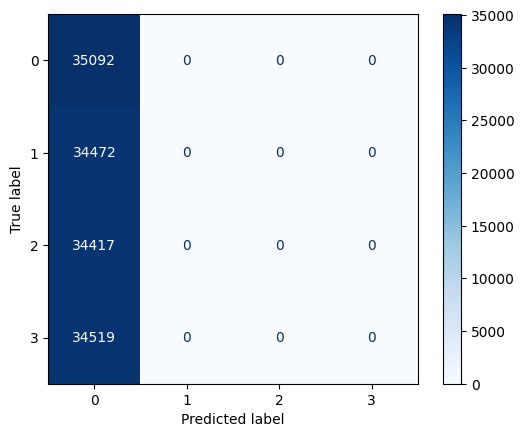

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs.to(device))
        predicted = torch.softmax(outputs, dim=1).argmax(dim=1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Paso 2: Calcular la matriz de confusión
cm = confusion_matrix(all_labels, all_preds)

# Paso 3: Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

De esta manera la red neuronal no "aprende" si no que predice todos los valores a 0.